In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import cufflinks as cf
import plotly.express as px
import plotly.io as pio
from PIL import Image

In [2]:
filt_shooting_df = pd.read_csv('filtered_contested_shooting_data.csv', index_col=0)


filt_shooting_df['C FG3A'] = filt_shooting_df['C FG3A'].astype(int)
filt_shooting_df['C FG3M'] = filt_shooting_df['C FG3M'].astype(int)
filt_shooting_df['CFG3'] = [f'{made}/{attempt}' for (made, attempt) in zip(filt_shooting_df['C FG3M'], filt_shooting_df['C FG3A'])]

filt_shooting_df['O FG3A'] = filt_shooting_df['O FG3A'].astype(int)
filt_shooting_df['O FG3M'] = filt_shooting_df['O FG3M'].astype(int)
filt_shooting_df['OFG3'] = [f'{made}/{attempt}' for (made, attempt) in zip(filt_shooting_df['O FG3M'], filt_shooting_df['O FG3A'])]

filt_shooting_df['C FG3%']= filt_shooting_df['C FG3%'].astype(float) * 100
filt_shooting_df['O FG3%']= filt_shooting_df['O FG3%'].astype(float) * 100
filt_shooting_df['Name'] = filt_shooting_df.index.values

In [10]:
len(filt_shooting_df.index)

28

In [3]:
onlyfiles = [f for f in listdir('headshots/') if isfile(join('headshots/', f))]

In [4]:
cf.set_config_file(sharing='public',theme='white',offline=True)

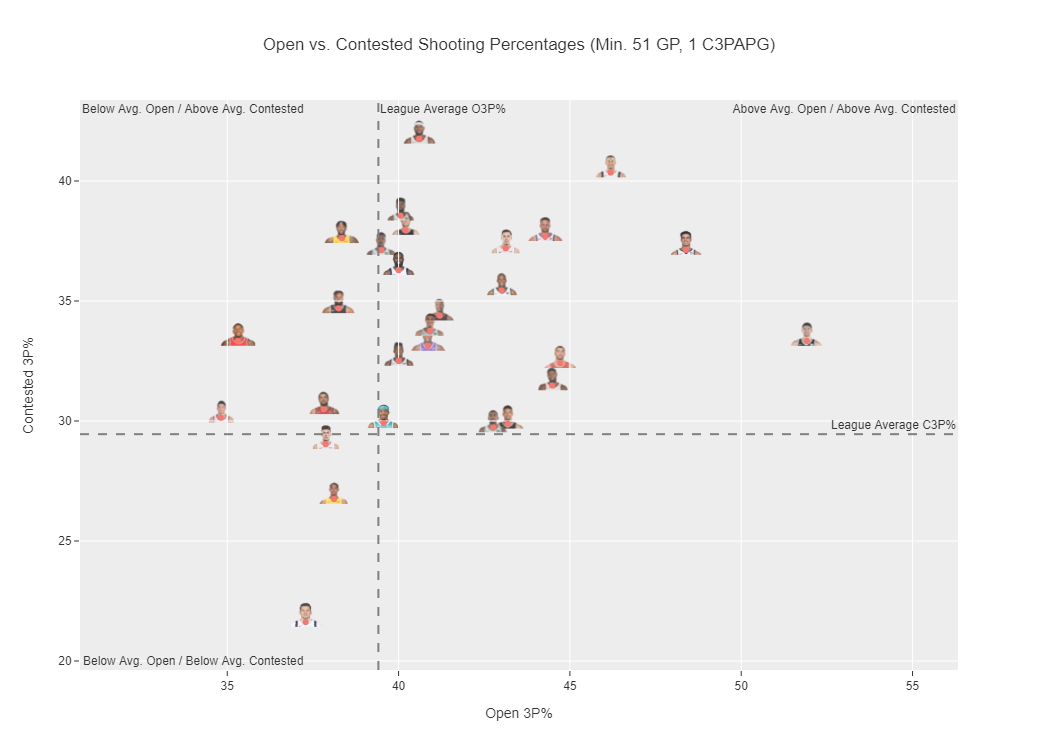

In [6]:
pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"

fig = px.scatter(filt_shooting_df, x="O FG3%", y="C FG3%", hover_data = ['OFG3', 'CFG3', 'Name'],
                 width=1000, height=750, labels={
                     "O FG3%": "Open 3P%",
                     "C FG3%": "Contested 3P%"
                 }, title="Open vs. Contested Shooting Percentages (Min. 51 GP, 1 C3PAPG)")
fig.add_hline(y=29.4513523624833, opacity=1, line_width=2, line_dash='dash', line_color='grey',
              annotation_text="League Average C3P%", 
              annotation_position="top right")
fig.add_vline(x=39.410248685329824, opacity=1, line_width=2, line_dash='dash', line_color='grey',
              annotation_text="League Average O3P%",
              annotation_position="top right")


for x, y, path in zip(filt_shooting_df['O FG3%'], filt_shooting_df['C FG3%'], onlyfiles):
    image = Image.open('headshots/' + path)                                                       
    fig.add_layout_image(dict(
        source=image,
        xref="x",
        yref="y",
        x=x-0.5,
        y=y+0.8,
        sizex=1,
        sizey=1,
        sizing="stretch",
        opacity=0.8,
        layer="below"
        )
    )
fig.update_layout(
    font_family="Helvetica",
)

fig.add_annotation(x=34, y=43,
            text="Below Avg. Open / Above Avg. Contested",
            showarrow=False)

fig.add_annotation(x=34, y=20,
            text="Below Avg. Open / Below Avg. Contested",
            showarrow=False)

fig.add_annotation(x=53, y=43,
            text="Above Avg. Open / Above Avg. Contested",
            showarrow=False)
fig.show()
fig.write_image("contested_shooting_scatter.png", scale=5.0)
fig.write_html("contested_shooting_scatter.html")